In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [3]:
df = pd.read_csv('labeled_dataset_4_categories.csv')
df = df.rename(columns={'Semantic_Label_4': 'label'})
df['label_encoded'] = df['label'].astype('category').cat.codes
label_mapping = dict(enumerate(df['label'].astype('category').cat.categories))
class_names = [label_mapping[i] for i in sorted(label_mapping.keys())]

In [4]:
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['Text'])
y = df['label_encoded']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)


In [13]:
svm_results = []

def run_svm(kernel_type, cost_value):
    print(f"\nKernel: {kernel_type.upper()} | C = {cost_value}")
    
    svm = SVC(kernel=kernel_type, C=cost_value, random_state=42)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {round(acc * 100, 2)}%")
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=class_names))
    
    svm_results.append({
        'Kernel': kernel_type,
        'C': cost_value,
        'Accuracy': round(acc * 100, 2)
    })
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap='Purples')
    plt.title(f"SVM Confusion Matrix ({kernel_type.upper()}, C={cost_value})")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [14]:
print("\nSample of original data (before preprocessing):\n")
print(df[['Text', 'label']].sample(5, random_state=42))

vectorized_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print("\nSample of vectorized data (after CountVectorizer):\n")
print(vectorized_df.sample(5, random_state=42))


Sample of original data (before preprocessing):

                                                   Text        label
2900  BP contingency plan for dealing with oil spill...  support_ban
51    ‘Back to plastic’: Trump pushes for plastic st...   oppose_ban
567   Vegan diet massively cuts environmental damage...      neutral
3268  Humans using resources of two planets, WWF war...      neutral
1987  Environmentalists sue EPA for reversing Obama-...  support_ban

Sample of vectorized data (after CountVectorizer):

      000  10  100  100bn  100km  100m  10m  10p  11  12  ...  yoghurt  york  \
2900    0   1    1      0      0     0    0    0   0   0  ...        0     0   
51      0   0    0      0      0     0    0    0   0   0  ...        0     0   
567     2   0    0      0      0     0    0    0   0   0  ...        0     0   
3268    0   0    0      0      0     0    0    0   0   1  ...        0     0   
1987    0   0    0      0      0     0    0    0   0   0  ...        0     0   

  


Kernel: LINEAR | C = 1
Accuracy: 67.17%

Classification Report:
              precision    recall  f1-score   support

     neutral       0.50      0.59      0.54       186
  oppose_ban       0.38      0.33      0.35        89
 support_ban       0.80      0.78      0.79       562
   unrelated       0.15      0.12      0.13        25

    accuracy                           0.67       862
   macro avg       0.46      0.45      0.45       862
weighted avg       0.67      0.67      0.67       862



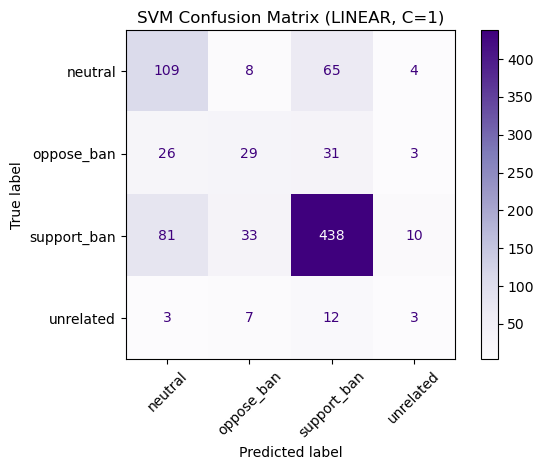


Kernel: LINEAR | C = 10
Accuracy: 65.2%

Classification Report:
              precision    recall  f1-score   support

     neutral       0.49      0.59      0.53       186
  oppose_ban       0.36      0.31      0.34        89
 support_ban       0.79      0.75      0.77       562
   unrelated       0.05      0.04      0.04        25

    accuracy                           0.65       862
   macro avg       0.42      0.42      0.42       862
weighted avg       0.66      0.65      0.65       862



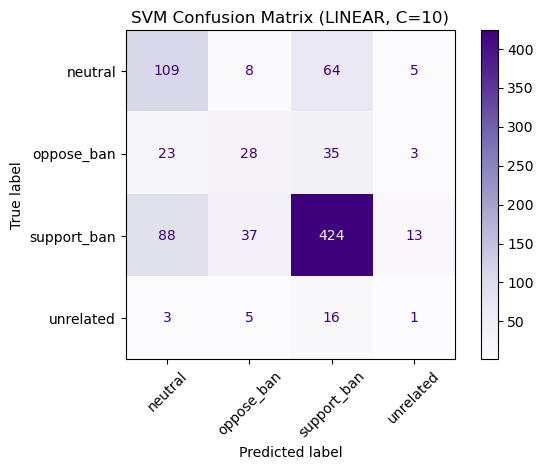

In [15]:
run_svm('linear', 1)
run_svm('linear', 10)


Kernel: RBF | C = 1
Accuracy: 71.35%

Classification Report:
              precision    recall  f1-score   support

     neutral       0.69      0.33      0.44       186
  oppose_ban       0.70      0.08      0.14        89
 support_ban       0.72      0.97      0.83       562
   unrelated       0.00      0.00      0.00        25

    accuracy                           0.71       862
   macro avg       0.53      0.34      0.35       862
weighted avg       0.69      0.71      0.65       862



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


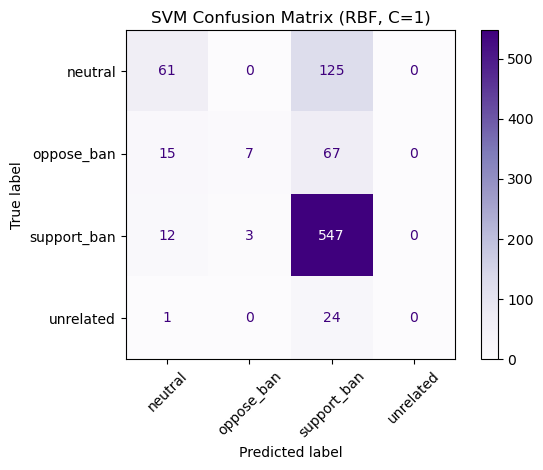


Kernel: RBF | C = 10
Accuracy: 72.62%

Classification Report:
              precision    recall  f1-score   support

     neutral       0.60      0.52      0.55       186
  oppose_ban       0.54      0.28      0.37        89
 support_ban       0.78      0.90      0.83       562
   unrelated       0.20      0.04      0.07        25

    accuracy                           0.73       862
   macro avg       0.53      0.43      0.46       862
weighted avg       0.70      0.73      0.70       862



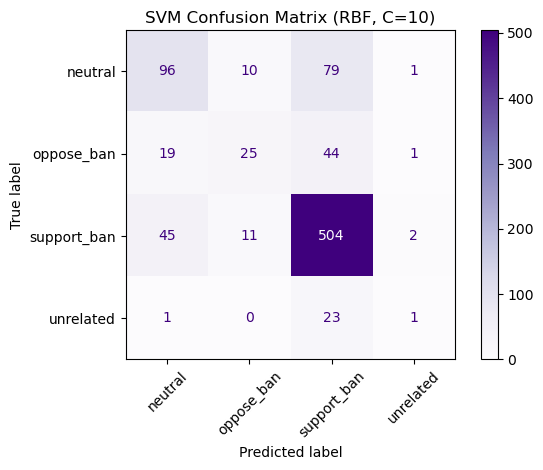

In [16]:
run_svm('rbf', 1)
run_svm('rbf', 10)


Kernel: POLY | C = 1
Accuracy: 64.73%

Classification Report:
              precision    recall  f1-score   support

     neutral       0.54      0.08      0.14       186
  oppose_ban       0.12      0.01      0.02        89
 support_ban       0.66      0.96      0.78       562
   unrelated       0.00      0.00      0.00        25

    accuracy                           0.65       862
   macro avg       0.33      0.26      0.24       862
weighted avg       0.56      0.65      0.54       862



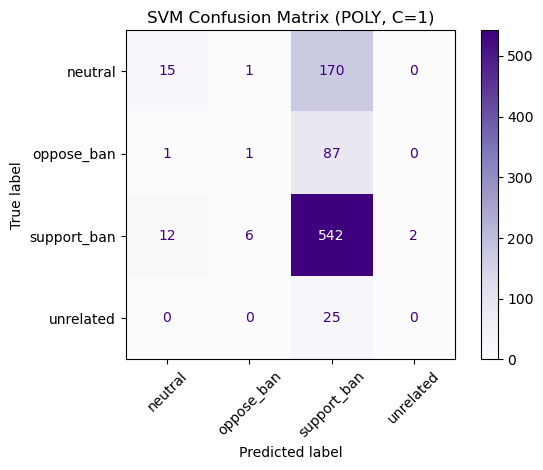


Kernel: POLY | C = 10
Accuracy: 65.55%

Classification Report:
              precision    recall  f1-score   support

     neutral       0.57      0.25      0.35       186
  oppose_ban       0.14      0.03      0.05        89
 support_ban       0.68      0.92      0.78       562
   unrelated       0.00      0.00      0.00        25

    accuracy                           0.66       862
   macro avg       0.35      0.30      0.30       862
weighted avg       0.58      0.66      0.59       862



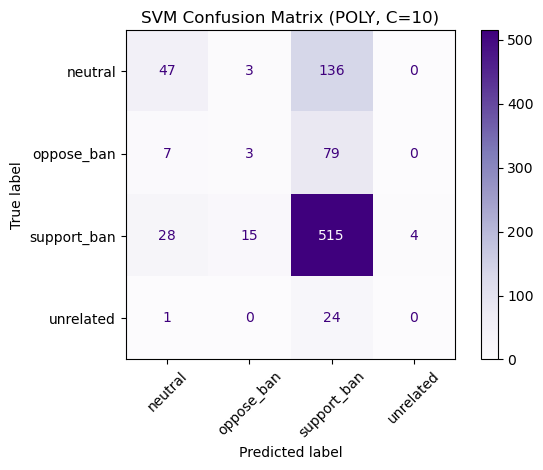

In [17]:
run_svm('poly', 1)
run_svm('poly', 10)

/var/folders/j7/q41jdqbs44549h57hb3nhfv00000gn/T/ipykernel_28423/3729035946.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=svm_df, x='Accuracy', y='Label', palette='cool')


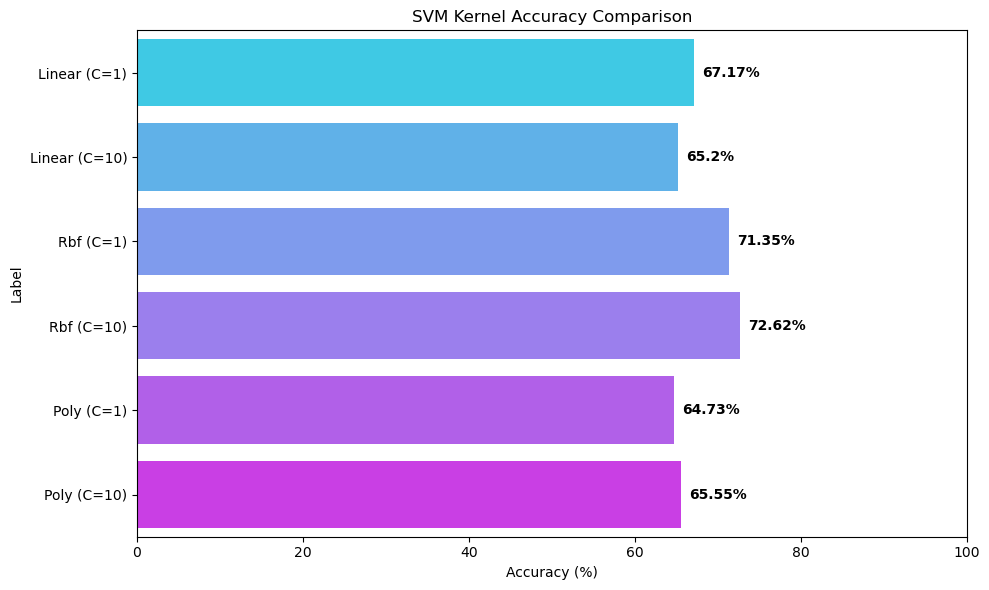

In [18]:
import pandas as pd

svm_df = pd.DataFrame(svm_results)
svm_df['Label'] = svm_df['Kernel'].str.capitalize() + " (C=" + svm_df['C'].astype(str) + ")"

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=svm_df, x='Accuracy', y='Label', palette='cool')
plt.xlim(0, 100)
plt.xlabel("Accuracy (%)")
plt.title("SVM Kernel Accuracy Comparison")
for index, row in svm_df.iterrows():
    plt.text(row['Accuracy'] + 1, index, f"{row['Accuracy']}%", va='center', fontweight='bold')
plt.tight_layout()
plt.show()
